In [5]:
# Example usage:
import pandas as pd
from load_dataframes import load_dataframes

# Load the CSV files into DataFrame objects
dataframes = load_dataframes('folder')
df=dataframes

df['resolved_binary']=df['resolved'].apply(lambda x: 1 if x == 'resolved'  else 0)
l=range(6,15)
# Create a new DataFrame combining 'first_six_letters' and 'reason' columns

for i in l:
    if i + 9 < len(df.columns):
        # Access the i-th and (i+9)-th columns
        column_i = df.iloc[:, i]
        column_i_9 = df.iloc[:, i + 9]

        # Extract rows where column_i is different from column_i_9
        different_rows = df[column_i != column_i_9]
        num_rows = len(different_rows)
        print(f"In between '{df.columns[i]}' and '{df.columns[i+9]}', the number of rows where the status became different is: \n", num_rows)

        distribution_rea = different_rows['reason'].value_counts()
        print("The reasons why they called is: \n", distribution_rea)

        distribution_res = different_rows['resolved_binary'].value_counts()
        print("How many of them are resolved: \n", distribution_res)

In between 'no_of_accounts_with_syf_13_march' and 'no_of_accounts_with_syf_18_march', the number of rows where the status became different is: 
 20521
The reasons why they called is: 
 BA    8543
PP    2884
LS    1687
PT    1231
FD    1028
AT     844
AA     763
FM     557
CT     388
RV     337
AP     234
DP     230
LC     220
RC     204
wa     178
mp     173
IA     152
IC     104
mn      82
PI      77
GA      58
CA      51
PA      49
Pd      45
iR      36
RP      34
SP      31
me      27
WA      26
iL      25
CB      21
DR      21
PS      21
SR      19
MP      17
eA      14
FR      14
eP      13
iF      12
eY      12
PC      10
eL       9
FI       7
RS       7
RI       5
CD       4
ER       3
VA       3
iM       3
iA       2
DE       2
LW       1
BL       1
AU       1
mP       1
Name: reason, dtype: int64
How many of them are resolved: 
 0    11450
1     9071
Name: resolved_binary, dtype: int64
In between 'account_balance_13_march' and 'account_balance_18_march', the number of rows whe

In [315]:
PP_reason = df[df['reason'] == 'PP']
I=['eservice_ind_13_march','ebill_enrolled_status_13_march','auto_pay_enrolled_status_13_march']
for i in I:
    ee = PP_reason[i].value_counts()
    print(ee)

0    500744
1    177570
Name: eservice_ind_13_march, dtype: int64
     419911
E    128895
L    121404
B      6492
D       257
Name: ebill_enrolled_status_13_march, dtype: int64
0    675130
1      3184
Name: auto_pay_enrolled_status_13_march, dtype: int64


In [87]:
print(df['reason'].value_counts().head(10))


PP    678314
BA    566351
PT    221583
AT     91404
AA     54861
CT     23796
wa     14296
LS     13765
FD     13007
LC     10076
Name: reason, dtype: int64


In [14]:
def resolve_status(row):
    if row['resolved'] == 'resolved' and row['last_two_letters'] == "TR":
        return 'hung_up'
    elif row['resolved'] == 'resolved' and row['last_two_letters'] != "TR":
        return 'resolved'
    else:
        return 'floor'

# Apply the function to create the 'resolved_2' column
df['resolved_2'] = df.apply(resolve_status, axis=1)

If a customer's autopay status is 0 
 hung_up     637923
floor        33050
resolved      4157
Name: resolved_2, dtype: int64
If a customer's autopay status is 1 
 hung_up     2617
floor        512
resolved      55
Name: resolved_2, dtype: int64


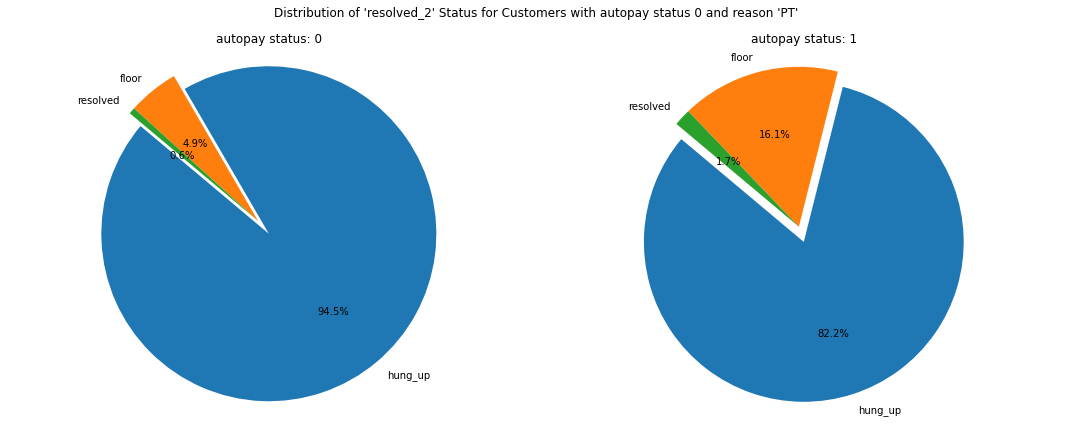

In [343]:
import matplotlib.pyplot as plt

I = [0, 1]

# Create a single figure outside the loop
plt.figure(figsize=(15, 6))

for idx, status in enumerate(I):
    PP_reason_ee = df[(df['reason'] == 'PP') & (df['auto_pay_enrolled_status_13_march'] == status)]
    res_PP = PP_reason_ee['resolved_2'].value_counts()
    print("If a customer's autopay status is", status, "\n", res_PP)
    
    # Pie chart
    labels = res_PP.keys()
    sizes = res_PP.values
    explode = (0.1, 0, 0)  # explode the 1st slice
    
    # Plot each pie chart within the same figure
    plt.subplot(1, len(I), idx+1)
    plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title("autopay status: " + str(status))

plt.suptitle("Distribution of 'resolved_2' Status for Customers with autopay status 0 and reason 'PT'")
plt.tight_layout()
plt.show()


In [82]:
eserv=df[df['eservice_ind_13_march'] == 0]
print(eserv['reason'].value_counts())
eserv=df[df['eservice_ind_13_march'] == 1]
print(eserv['reason'].value_counts())

PP    500744
BA    358130
PT    154260
AT     49763
AA     34378
       ...  
OB         4
mt         3
NU         2
iT         1
mm         1
Name: reason, Length: 70, dtype: int64
BA    208221
PP    177570
PT     67323
AT     41641
AA     20483
       ...  
HI         1
iT         1
mo         1
ss         1
CS         1
Name: reason, Length: 67, dtype: int64


In [6]:
eserv=df[df['auto_pay_enrolled_status_13_march'] == 0]
print(eserv['reason'].count())
eserv=df[df['auto_pay_enrolled_status_13_march'] == 1]
print(eserv['reason'].count())

1758346
40452


In [8]:
eserv=df[df['eservice_ind_13_march'] == 0]
print(eserv['reason'].count())
eserv=df[df['eservice_ind_13_march'] == 1]
print(eserv['reason'].count())

1205973
592825


In [9]:
eserv=df[df['ebill_enrolled_status_13_march'] == 'E']
print(eserv['reason'].count())
eserv=df[df['ebill_enrolled_status_13_march'] == ' ']
print(eserv['reason'].count())
eserv=df[df['ebill_enrolled_status_13_march'] == 'B']
print(eserv['reason'].count())
eserv=df[df['ebill_enrolled_status_13_march'] == 'L']
print(eserv['reason'].count())

508389
943900
32084
305433


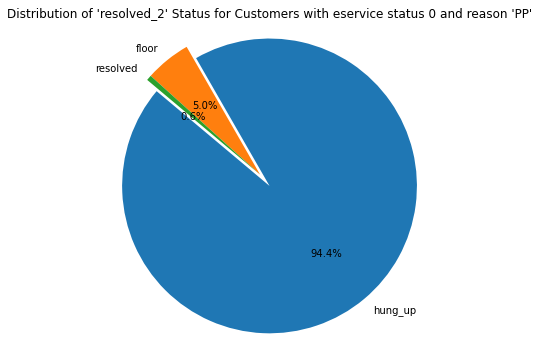

In [326]:
import matplotlib.pyplot as plt

# Your result

# Pie chart
labels = result.keys()
sizes = result.values()
explode = (0.1, 0, 0)  # explode the 1st slice

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title("Distribution of 'resolved_2' Status for Customers with eservice status 0 and reason 'PP'")
plt.show()


In [317]:
CT_reason = df[df['reason'] == 'CT']
I=['eservice_ind_13_march','ebill_enrolled_status_13_march','auto_pay_enrolled_status_13_march']
for i in I:
    ee = CT_reason[i].value_counts()
    print(ee)

0    11981
1    11815
Name: eservice_ind_13_march, dtype: int64
E    12154
      8913
L     2389
B      195
D      106
Name: ebill_enrolled_status_13_march, dtype: int64
0    22883
1      913
Name: auto_pay_enrolled_status_13_march, dtype: int64


In [102]:
res = df[df['resolved'] == 'resolved']
flr = df[df['resolved'] == 'floor']
res_dis = res['reason'].value_counts()
print("The reasons where the caller's issue is resolved are:\n",res_dis.head(10))
flr_dis = flr['reason'].value_counts()
print("The reasons where the caller's issue is not resolved are:\n", flr_dis.head(10))

The reasons where the caller's issue is resolved are:
 PP    644752
BA    407957
PT    203274
AT     82717
AA     39772
CA      5103
IC      4757
LS      4283
IA      3817
CB      3438
Name: reason, dtype: int64
The reasons where the caller's issue is not resolved are:
 BA    158394
PP     33562
CT     23082
PT     18309
AA     15089
wa     13248
FD     12474
LS      9482
AT      8687
LC      7582
Name: reason, dtype: int64


In [161]:
df3=pd.read_csv('folder/file_3_Mar18_Output_1.csv')
df4=pd.read_csv('folder/file_4_Mar18_Output_1.csv')
df3['resolved_binary']=df3['resolved'].apply(lambda x: 1 if x == 'resolved' else 0)
df4['resolved_binary']=df4['resolved'].apply(lambda x: 1 if x == 'resolved' else 0)


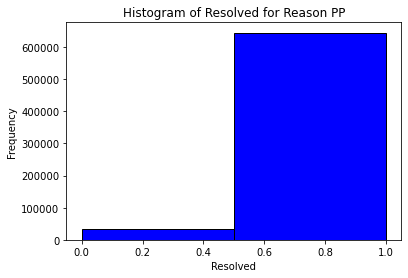

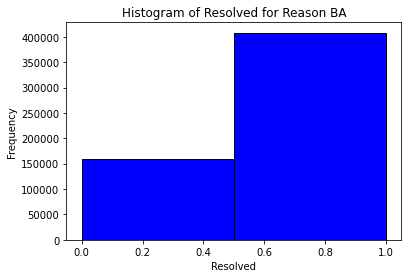

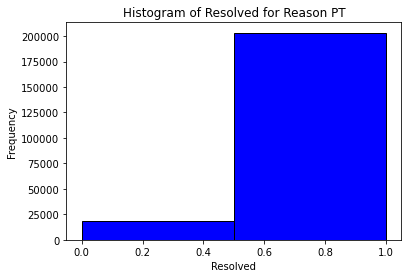

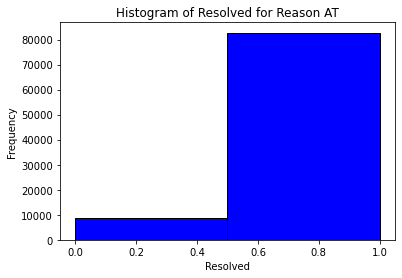

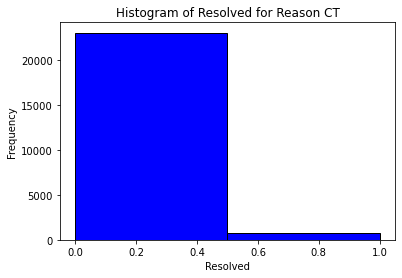

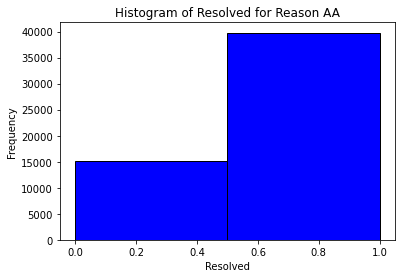

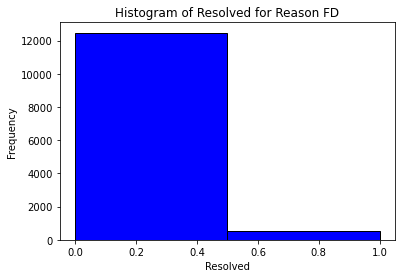

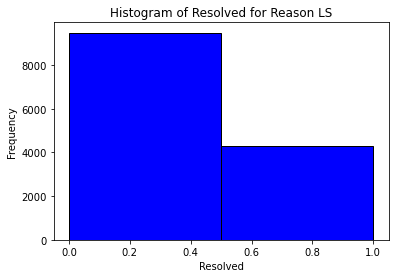

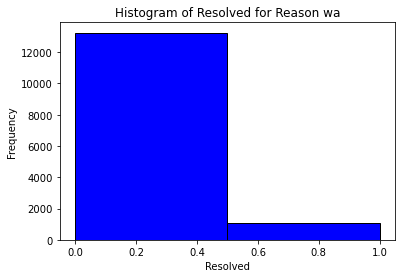

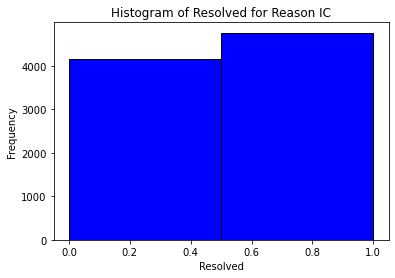

In [169]:
df3_reasons = df3['reason'].value_counts()
df4_reasons = df4['reason'].value_counts()

l3=['PP','BA', 'PT','AT','CT','AA','FD','LS','wa','IC']

for i in l3:
    pp_df = df[df['reason'] == i]

    # Plot a histogram of the 'resolved' column
    plt.hist(pp_df['resolved_binary'], bins=2, color='blue', edgecolor='black')

    # Add labels and title
    plt.xlabel('Resolved')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of Resolved for Reason {i}')

    # Show the plot
    plt.show()


In [172]:
print(df3_reasons.head(10))
print(df4_reasons.head(10))

PP    354598
BA    307825
PT    112212
AT     38547
CT     11120
AA     10217
FD      7847
LS      6631
wa      6352
IC      3578
Name: reason, dtype: int64
PP    323716
BA    258526
PT    109371
AT     52857
AA     44644
CT     12676
LC      9478
wa      7944
LS      7134
Pd      7012
Name: reason, dtype: int64


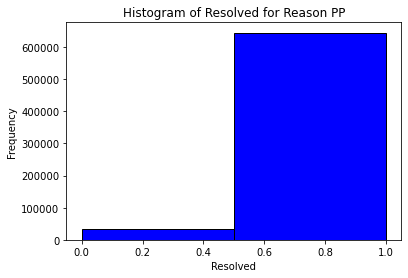

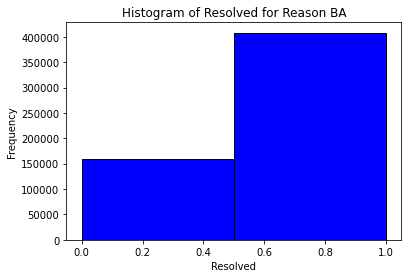

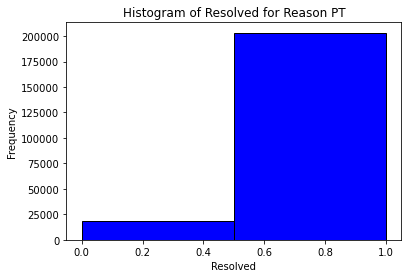

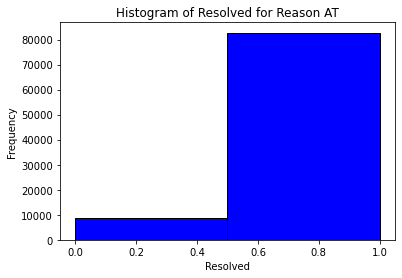

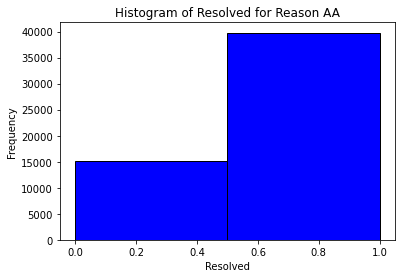

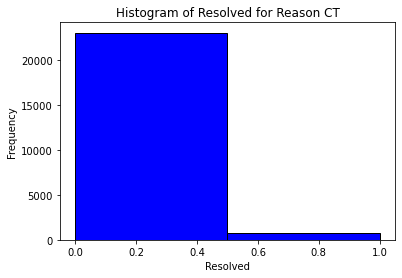

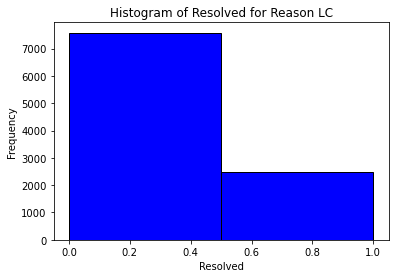

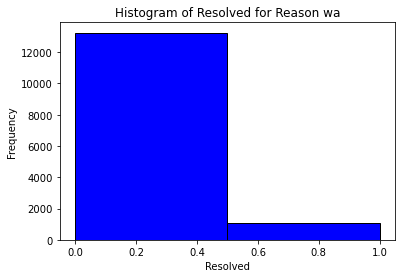

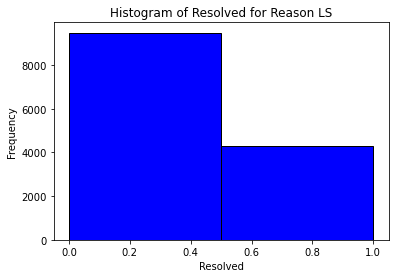

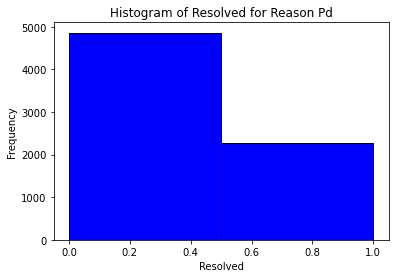

In [170]:

l4=['PP','BA', 'PT','AT','AA','CT','LC','wa','LS','Pd']

for i in l4:
    pp_df = df[df['reason'] == i]

    # Plot a histogram of the 'resolved' column
    plt.hist(pp_df['resolved_binary'], bins=2, color='blue', edgecolor='black')

    # Add labels and title
    plt.xlabel('Resolved')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of Resolved for Reason {i}')

    # Show the plot
    plt.show()



In [64]:
num_resolved3 = df3[df3['resolved_binary'] == 1].shape[0]

print("Number of rows with resolved in df3 is", num_resolved3)

num_resolved3 = df3[df3['resolved_binary'] == 0].shape[0]

print("Number of rows with floor in df3 is", num_resolved3)

num_resolved4 = df4[df4['resolved_binary'] == 1].shape[0]

print("Number of rows with resolved in df4 is", num_resolved4)

num_resolved4 = df4[df4['resolved_binary'] == 0].shape[0]

print("Number of rows with floor in df4 is", num_resolved4)


Number of rows with resolved in df3 is 740174
Number of rows with floor in df3 is 164459
Number of rows with resolved in df4 is 692407
Number of rows with floor in df4 is 201758


In [189]:
unique_values3 = df3['reason'].unique()

# Initialize an empty list to store tuples of (reason, total)
datum=[]

# Calculate total for each group and store in the list
for i in unique_values3:
    mosba = df3[df3['reason'] == i]
    average = mosba['resolved_binary'].mean()
    total = mosba['reason'].value_counts().sum()  # Calculate the total count
    datum.append((i, average, total))


# Sort the list of tuples based on the total values
sorted_datum= sorted(datum, key=lambda x: x[2], reverse=True)

# Print the sorted list of tuples
for reason, average, total in sorted_datum:
    if total>=1000:
        print("Reason:", reason, "| Average:", average, "| Total:", total)

Reason: PP | Average: 0.9533979323064428 | Total: 354598
Reason: BA | Average: 0.764138715179079 | Total: 307825
Reason: PT | Average: 0.9276815313870175 | Total: 112212
Reason: AT | Average: 0.872389550418969 | Total: 38547
Reason: CT | Average: 0.037589928057553956 | Total: 11120
Reason: AA | Average: 0.5406675149261035 | Total: 10217
Reason: FD | Average: 0.03415317955906716 | Total: 7847
Reason: LS | Average: 0.3421806665661288 | Total: 6631
Reason: wa | Average: 0.0802896725440806 | Total: 6352
Reason: IC | Average: 0.5245947456679709 | Total: 3578
Reason: IA | Average: 0.44431785816006836 | Total: 3511
Reason: AP | Average: 0.28679245283018867 | Total: 3180
Reason: mp | Average: 0.3445604580666891 | Total: 2969
Reason: DP | Average: 0.01572112098427888 | Total: 2926
Reason: FM | Average: 0.07834101382488479 | Total: 2821
Reason: PI | Average: 0.7708609271523179 | Total: 2265
Reason: WA | Average: 0.37989857076994005 | Total: 2169
Reason: CA | Average: 0.8461538461538461 | Total: 

In [190]:

unique_values4 = df4['reason'].unique()

# Initialize an empty list to store tuples of (reason, total)
datum=[]


# Calculate total for each group and store in the list
for i in unique_values4:
    mosba = df4[df4['reason'] == i]
    average = mosba['resolved_binary'].mean()
    total = mosba['reason'].value_counts().sum()  # Calculate the total count
    datum.append((i, average, total))


# Sort the list of tuples based on the total values
sorted_datum= sorted(datum, key=lambda x: x[2], reverse=True)

# Print the sorted list of tuples
for reason, average, total in sorted_datum:
    if total>=1000:
        print("Reason:", reason, "| Average:", average, "| Total:", total)


Reason: PP | Average: 0.9473705346661889 | Total: 323716
Reason: BA | Average: 0.6681571679444234 | Total: 258526
Reason: PT | Average: 0.9067943056203198 | Total: 109371
Reason: AT | Average: 0.9287133208468131 | Total: 52857
Reason: AA | Average: 0.76713556132963 | Total: 44644
Reason: CT | Average: 0.02335121489428842 | Total: 12676
Reason: LC | Average: 0.2501582612365478 | Total: 9478
Reason: wa | Average: 0.06772406847935548 | Total: 7944
Reason: LS | Average: 0.28231006447995516 | Total: 7134
Reason: Pd | Average: 0.3214489446662864 | Total: 7012
Reason: IC | Average: 0.5400337521095069 | Total: 5333
Reason: FD | Average: 0.05135658914728682 | Total: 5160
Reason: mp | Average: 0.25080731969860065 | Total: 4645
Reason: IA | Average: 0.5496833901607404 | Total: 4106
Reason: DP | Average: 0.013986013986013986 | Total: 4004
Reason: CA | Average: 0.8707393812270582 | Total: 3814
Reason: AP | Average: 0.3595378979994365 | Total: 3549
Reason: mn | Average: 0.2945990180032733 | Total: 3

In [103]:
delin1320 = df[df['delinquency_history_13_march']=="[20]"]
delin1820 = df[df['delinquency_history_18_march']=="[20]"]

res_delin13 = delin1320['resolved'].value_counts()
print(res_delin13)
res_delin18 = delin1820['reason'].value_counts()
print(res_delin18)


resolved    47951
floor       15407
Name: resolved, dtype: int64
BA    21694
PP    13941
PT    12150
wa     3967
AT     2368
IA     1159
AA      934
CT      882
WA      718
FD      481
mn      458
LS      401
mp      387
LC      343
IC      335
DP      290
SP      284
PI      245
Pd      215
AP      205
PS      154
PA      136
CA      134
FM      122
MP      122
RC      104
DR      103
CB       95
RI       87
eY       87
RV       82
me       79
GA       75
eL       63
RP       63
SR       56
iL       45
iR       42
PC       39
CD       27
eP       25
eA       19
FR       19
OB       12
mP       11
eR        9
iM        8
BL        8
FI        6
DE        4
RS        4
ER        3
iS        3
LW        2
VA        2
m-        2
CS        1
iA        1
Name: reason, dtype: int64


In [106]:
mos = df['mos']
mosstr=mos.str[-2:]

last_two_letters = mosstr.value_counts()
print(last_two_letters.head(20))

TR    1203551
BA     262902
nl     118566
AT      59882
TS      37737
MR      29654
mm      21401
LC       8626
TA       8608
mt       6530
Mr       4508
PP       4165
PI       3502
RS       3499
AA       3110
SP       2003
IC       1858
mp       1857
IA       1317
mo       1268
Name: mos, dtype: int64


In [13]:
df['last_two_letters'] = df['mos'].str[-2:]

In [191]:
res=df[df['resolved']=='floor']
print(res['last_two_letters'].value_counts())

TR    350077
LC      6064
RS      3461
mt      1907
nl      1479
wa       677
mm       487
mo       453
CT       372
PT       170
AT       159
mp       137
BA       105
LS        91
AP        63
me        44
HI        41
RC        40
MP        32
WA        31
SR        30
IC        28
eA        27
iR        26
AU        22
SP        21
iL        18
PS        14
CA        11
TS        11
FM        11
eY        10
PA        10
TN         9
GA         8
iM         7
eL         7
eP         6
TC         5
TD         5
PC         5
AA         5
Pd         4
IA         4
RP         4
TB         3
mP         3
VA         2
BL         2
eR         2
iA         2
MR         2
eB         1
iP         1
iS         1
Name: last_two_letters, dtype: int64


In [192]:
res=df[df['resolved']=='resolved']
print(res['last_two_letters'].value_counts())

TR    853474
BA    262797
nl    117087
AT     59723
TS     37726
       ...  
iO         1
BL         1
ss         1
iT         1
iS         1
Name: last_two_letters, Length: 76, dtype: int64


In [193]:
tr=df[df['last_two_letters']=='TR']
print(tr['resolved'].value_counts())

resolved    853474
floor       350077
Name: resolved, dtype: int64


In [160]:
mosba = df[mos.str[-2:]=="BA"]
average = mosba['resolved_binary'].mean()

print(average)

0.9996006116347537


In [134]:
sorted_df = df.sort_values(by='last_two_letters', ascending=True)
unique_values = sorted_df['last_two_letters'].unique()
for i in unique_values:
    mosba = df[(df['last_two_letters'] == i)]
    mosb = mosba['resolved_binary'].value_counts()
    print("Distribution of", i, "is\n", mosb)

Distribution of AA is
 1    3105
Name: resolved_binary, dtype: int64
Distribution of AP is
 1    535
Name: resolved_binary, dtype: int64
Distribution of AT is
 1    59723
Name: resolved_binary, dtype: int64
Distribution of AU is
 1    375
Name: resolved_binary, dtype: int64
Distribution of BA is
 1    262797
Name: resolved_binary, dtype: int64
Distribution of BL is
 1    1
Name: resolved_binary, dtype: int64
Distribution of CA is
 1    138
Name: resolved_binary, dtype: int64
Distribution of CB is
 1    451
Name: resolved_binary, dtype: int64
Distribution of CD is
 1    5
Name: resolved_binary, dtype: int64
Distribution of CT is
 1    125
Name: resolved_binary, dtype: int64
Distribution of DP is
 1    58
Name: resolved_binary, dtype: int64
Distribution of DR is
 1    582
Name: resolved_binary, dtype: int64
Distribution of ER is
 1    107
Name: resolved_binary, dtype: int64
Distribution of FI is
 1    95
Name: resolved_binary, dtype: int64
Distribution of FM is
 1    68
Name: resolved_bi

In [139]:
resb1 = df[(df['resolved_binary'] == 1)]
reb1=resb1['last_two_letters'].value_counts()
print(reb1.head(10))

TR    853474
BA    262797
nl    117087
AT     59723
TS     37726
MR     29652
mm     20914
TA      8608
mt      4623
Mr      4508
Name: last_two_letters, dtype: int64


In [138]:
resb1 = df[(df['resolved_binary'] == 0)]
reb1=resb1['last_two_letters'].value_counts()
print(reb1)

TR    350077
LC      6064
RS      3461
mt      1907
nl      1479
wa       677
mm       487
mo       453
CT       372
PT       170
AT       159
mp       137
BA       105
LS        91
AP        63
me        44
HI        41
RC        40
MP        32
WA        31
SR        30
IC        28
eA        27
iR        26
AU        22
SP        21
iL        18
PS        14
CA        11
TS        11
FM        11
eY        10
PA        10
TN         9
GA         8
iM         7
eL         7
eP         6
TC         5
TD         5
PC         5
AA         5
Pd         4
IA         4
RP         4
TB         3
mP         3
VA         2
BL         2
eR         2
iA         2
MR         2
eB         1
iP         1
iS         1
Name: last_two_letters, dtype: int64


In [177]:
unique_values = df['reason'].unique()

# Initialize an empty list to store tuples of (reason, average)
averages = []
totals=[]
# Calculate average for each group and store in the list
for i in unique_values:
    average = df[df['reason'] == i]['resolved_binary'].mean()
    averages.append((i, average))
    total = df[df['reason']==i]['reason'].value_counts()
    totals.append((i,total))

# Sort the list of tuples based on the average values
sorted_averages = sorted(averages, key=lambda x: x[1], reverse=True)
sorted_totals = sorted(totals, key=lambda x: x[1], reverse=True)
r=[]
# Print the sorted list of tuples
for reason, average in sorted_averages:
    if average<=0.6:
        print("Reason:", reason, "| Average:", average)

ValueError: Can only compare identically-labeled Series objects

In [ ]:
averages = []
totals=[]
# Calculate average for each group and store in the list
for i in unique_values:
    average = df[df['reason'] == i]['resolved_binary'].mean()
    averages.append((i, average))
    total = df[df['reason']==i]['reason'].value_counts()
    totals.append((i,total))

# Sort the list of tuples based on the average values
sorted_averages = sorted(averages, key=lambda x: x[1], reverse=True)
sorted_totals = sorted(totals, key=lambda x: x[1], reverse=True)
r=[]
# Print the sorted list of tuples
for reason, average in sorted_averages:
    if average<=0.6:
        print("Reason:", reason, "| Average:", average)

In [153]:
reb1 = df[df['reason'].isin(r)]['reason'].value_counts()
print(reb1)


CT    23796
wa    14296
LS    13765
FD    13007
LC    10076
IC     8911
IA     7617
mp     7614
Pd     7125
DP     6930
AP     6729
WA     4910
FM     4755
RC     4185
mn     4028
RV     3756
PA     2608
iR     2162
me     2150
iL     2071
GA     2042
PS     1772
eL     1642
DR     1524
MP     1503
eY     1192
SR     1070
RI      873
eP      769
PC      743
eA      697
CD      477
DE      282
eR      255
iM      215
mP      178
FI      174
BL      174
iA       87
VA       82
RS       72
CS       71
LW       58
iP       43
iS       28
eB       27
m-       18
AU       16
OB       13
iF       12
eS        9
mt        5
iT        2
NU        2
ss        1
mo        1
HI        1
Name: reason, dtype: int64


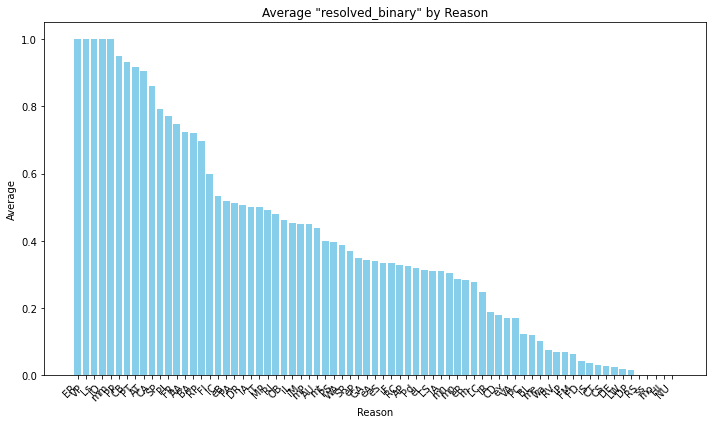

In [146]:
# Extract averages and reasons from the sorted list of tuples
averages = [average for _, average in sorted_averages]
reasons = [reason for reason, _ in sorted_averages]

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(reasons, averages, color='skyblue')
plt.xlabel('Reason')
plt.ylabel('Average')
plt.title('Average "resolved_binary" by Reason')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [132]:
for i in unique_values:
    mosba = df[mos.str[-2:]==i]
    average = mosba['resolved_binary'].mean()
    print("The percentage of resolving the issue",i,"is",average)

The percentage of resolving the issue AA is 0.9983922829581994
The percentage of resolving the issue AP is 0.8946488294314381
The percentage of resolving the issue AT is 0.997344778063525
The percentage of resolving the issue AU is 0.9445843828715366
The percentage of resolving the issue BA is 0.9996006116347537
The percentage of resolving the issue BL is 0.3333333333333333
The percentage of resolving the issue CA is 0.9261744966442953
The percentage of resolving the issue CB is 1.0
The percentage of resolving the issue CD is 1.0
The percentage of resolving the issue CT is 0.2515090543259557
The percentage of resolving the issue DP is 1.0
The percentage of resolving the issue DR is 1.0
The percentage of resolving the issue ER is 1.0
The percentage of resolving the issue FI is 1.0
The percentage of resolving the issue FM is 0.8607594936708861
The percentage of resolving the issue GA is 0.9207920792079208
The percentage of resolving the issue HI is 0.8366533864541833
The percentage of re

In [198]:
df['last_two_letters'] = df['mos'].str[-2:]
df['resolved_binary'] = df.apply(lambda x: 1 if x['resolved'] == 'resolved' and x['last_two_letters'] != "TR" else 0, axis=1)

pp=df[df['reason']=='PP']
print(tr['resolved'].value_counts())

resolved    644752
floor        33562
Name: resolved, dtype: int64


In [197]:
unique_values = df['reason'].unique()

# Initialize an empty list to store tuples of (reason, total)
datum=[]

# Calculate total for each group and store in the list
for i in unique_values:
    mosba = df[df['reason'] == i]
    average = mosba['resolved_binary'].mean()
    total = mosba['reason'].value_counts().sum()  # Calculate the total count
    datum.append((i, average, total))


# Sort the list of tuples based on the total values
sorted_datum= sorted(datum, key=lambda x: x[2], reverse=True)

# Print the sorted list of tuples
for reason, average, total in sorted_datum:
    if total>=1000:
        print("Reason:", reason, "| Average:", average, "| Total:", total)

Reason: PP | Average: 0.0062095135881022655 | Total: 678314
Reason: BA | Average: 0.7151113002360727 | Total: 566351
Reason: PT | Average: 0.013317808676658409 | Total: 221583
Reason: AT | Average: 0.9029911163625224 | Total: 91404
Reason: AA | Average: 0.6861522757514446 | Total: 54861
Reason: CT | Average: 0.025172297865187425 | Total: 23796
Reason: wa | Average: 0.06561275881365417 | Total: 14296
Reason: LS | Average: 0.2873955684707592 | Total: 13765
Reason: FD | Average: 0.0 | Total: 13007
Reason: LC | Average: 0.24712187375942835 | Total: 10076
Reason: IC | Average: 0.42924475367523285 | Total: 8911
Reason: IA | Average: 0.16620716817644743 | Total: 7617
Reason: mp | Average: 0.27515103756238507 | Total: 7614
Reason: Pd | Average: 0.13052631578947368 | Total: 7125
Reason: DP | Average: 0.008513708513708513 | Total: 6930
Reason: AP | Average: 0.30093624609897457 | Total: 6729
Reason: CA | Average: 0.8591216216216216 | Total: 5920
Reason: WA | Average: 0.38329938900203664 | Total: 

In [221]:
df['resolved_binary'] = df['resolved'].apply(lambda x: 1 if x == 'resolved' else 0)
df['resolved_2'] = df.apply(lambda x: 'hung_up' if x['resolved'] == 'resolved' and x['last_two_letters'] == "TR" else ('resolved' if x['resolved'] == 'resolved' and x['last_two_letters'] != "TR" else 'floor'), axis=1)
df['resolved_binary_2'] = df.apply(lambda x: 1 if x['resolved'] == 'resolved' and x['last_two_letters'] != "TR" else 0, axis=1)


l3=['PP','BA', 'PT','AT','CT','AA','FD','LS','wa','IC']

print(df[df['reason']=='PP']['resolved'].value_counts())
print(df[df['reason']=='PP']['resolved_binary'].mean())
print(df[df['reason']=='PP']['resolved_2'].value_counts())
print(df[df['reason']=='PP']['resolved_binary_2'].mean())




resolved    644752
floor        33562
Name: resolved, dtype: int64
0.9505214399231035
hung_up    640540
0           37774
Name: resolved_2, dtype: int64
0.0062095135881022655


In [222]:
for i in l3:
    print(df[df['reason']==i]['resolved'].value_counts())
    print(df[df['reason']==i]['resolved_binary'].mean())
    print(df[df['reason']==i]['resolved_2'].value_counts())
    print(df[df['reason']==i]['resolved_binary_2'].mean())

resolved    644752
floor        33562
Name: resolved, dtype: int64
0.9505214399231035
hung_up    640540
0           37774
Name: resolved_2, dtype: int64
0.0062095135881022655
resolved    407957
floor       158394
Name: resolved, dtype: int64
0.7203253812564999
0          563398
hung_up      2953
Name: resolved_2, dtype: int64
0.7151113002360727
resolved    203274
floor        18309
Name: resolved, dtype: int64
0.917371820040346
hung_up    200323
0           21260
Name: resolved_2, dtype: int64
0.013317808676658409
resolved    82717
floor        8687
Name: resolved, dtype: int64
0.9049603956063192
0          91224
hung_up      180
Name: resolved_2, dtype: int64
0.9029911163625224
floor       23082
resolved      714
Name: resolved, dtype: int64
0.03000504286434695
0          23681
hung_up      115
Name: resolved_2, dtype: int64
0.025172297865187425
resolved    39772
floor       15089
Name: resolved, dtype: int64
0.7249594429558338
0          52732
hung_up     2129
Name: resolved_2, dtype

In [206]:
df3['resolved_binary']=df3['resolved'].apply(lambda x: 1 if x == 'resolved' else 0)
df4['resolved_binary']=df3['resolved'].apply(lambda x: 1 if x == 'resolved' else 0)

print(df3['resolved_binary'].mean())
print(df4['resolved_binary'].mean())

0.8182036251164837
0.8182650853030481


In [211]:
df3['last_two_letters'] = df3['mos'].str[-2:]
df4['last_two_letters'] = df['mos'].str[-2:]

df3['resolved_binary'] = df3.apply(lambda x: 1 if x['resolved'] == 'resolved' and x['last_two_letters'] != "TR" else 0, axis=1)
df4['resolved_binary'] = df4.apply(lambda x: 1 if x['resolved'] == 'resolved' and x['last_two_letters'] != "TR" else 0, axis=1)
print(df3['resolved_binary'].mean())
print(df4['resolved_binary'].mean())


0.32782686459591903
0.3159864230874615


In [214]:
pp=df[df['reason']=='PP']
distribution_bin = pp['resolved_binary'].value_counts()
distribution_last=pp['last_two_letters'].value_counts()
print(distribution_bin)
print(distribution_last)

0    674102
1      4212
Name: resolved_binary, dtype: int64
TR    674099
PP      4165
nl        23
wa         9
mm         7
RS         4
mo         1
WA         1
AT         1
CT         1
mp         1
mt         1
BA         1
Name: last_two_letters, dtype: int64


In [228]:
unique_values = df['reason'].unique()

# Initialize an empty list to store tuples of (reason, total)
datum=[]


# Calculate total for each group and store in the list
for i in unique_values:
    mosba = df[df['reason'] == i]
    average = mosba['resolved_binary_2'].mean()
    total = mosba['reason'].value_counts().sum()  # Calculate the total count
    datum.append((i, average, total))


# Sort the list of tuples based on the total values
sorted_datum= sorted(datum, key=lambda x: x[1], reverse=True)

# Print the sorted list of tuples
for reason, average, total in sorted_datum:
    print("Reason:", reason, "| Average:", average, "| Total:", total)


Reason: ER | Average: 1.0 | Total: 107
Reason: VP | Average: 1.0 | Total: 61
Reason: Ls | Average: 1.0 | Total: 6
Reason: mm | Average: 1.0 | Total: 1
Reason: CB | Average: 0.9288034650785056 | Total: 3694
Reason: AT | Average: 0.9029911163625224 | Total: 91404
Reason: CA | Average: 0.8591216216216216 | Total: 5920
Reason: SP | Average: 0.7899034892353378 | Total: 2694
Reason: PI | Average: 0.7638526254714244 | Total: 3447
Reason: FR | Average: 0.746268656716418 | Total: 1273
Reason: BA | Average: 0.7151113002360727 | Total: 566351
Reason: AA | Average: 0.6861522757514446 | Total: 54861
Reason: RP | Average: 0.6663937781416291 | Total: 2443
Reason: FI | Average: 0.5632183908045977 | Total: 174
Reason: eB | Average: 0.5185185185185185 | Total: 27
Reason: PA | Average: 0.5099693251533742 | Total: 2608
Reason: DR | Average: 0.5026246719160105 | Total: 1524
Reason: iT | Average: 0.5 | Total: 2
Reason: MP | Average: 0.48902195608782434 | Total: 1503
Reason: RI | Average: 0.4742268041237113 

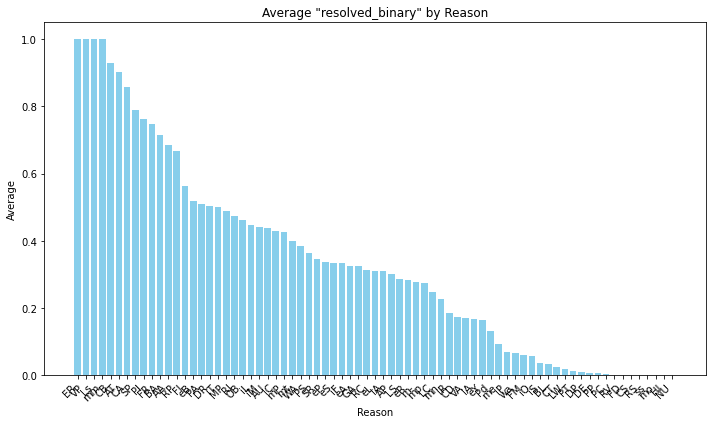

In [226]:
# Extract averages and reasons from the sorted list of tuples
averages = [average for _, average in sorted_averages]
reasons = [reason for reason, _ in sorted_averages]

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(reasons, averages, color='skyblue')
plt.xlabel('Reason')
plt.ylabel('Average')
plt.title('Average "resolved_binary" by Reason')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

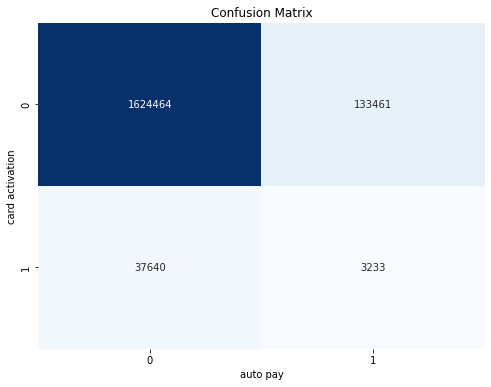

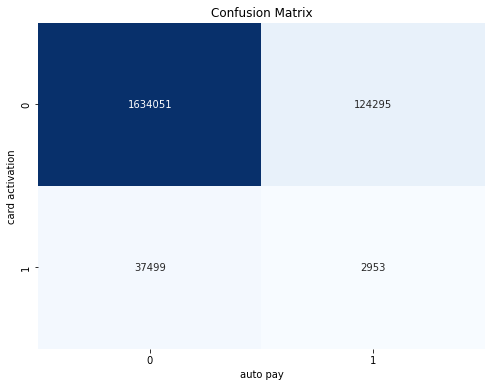

In [305]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


auto_pay = df['auto_pay_enrolled_status_18_march']
df['card_activation_status_18_march'] = pd.to_numeric(df['card_activation_status_18_march'], errors='coerce')

df['card_activation_status_18_march'] = df['card_activation_status_18_march'].fillna(0)

df['card_activation_18'] = df['card_activation_status_18_march'].apply(lambda x: 1 if x > 1 else 0)
card_activation=df['card_activation_18']
ebill=df['ebill_enrolled_status_18_march']
eservice = df['eservice_ind_18_march']


conf_matrix = confusion_matrix(auto_pay, card_activation)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('auto pay')
plt.ylabel('card activation')
plt.title('Confusion Matrix')
plt.show()


auto_pay = df['auto_pay_enrolled_status_13_march']
df['card_activation_status_13_march'] = pd.to_numeric(df['card_activation_status_13_march'], errors='coerce')
df['card_activation_status_13_march'] = df['card_activation_status_13_march'].fillna(0)
df['card_activation_13'] = df['card_activation_status_13_march'].apply(lambda x: 1 if x > 1 else 0)
card_activation=df['card_activation_13']
ebill=df['ebill_enrolled_status_13_march']
eservice = df['eservice_ind_13_march']


conf_matrix = confusion_matrix(auto_pay, card_activation)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('auto pay')
plt.ylabel('card activation')
plt.title('Confusion Matrix')
plt.show()


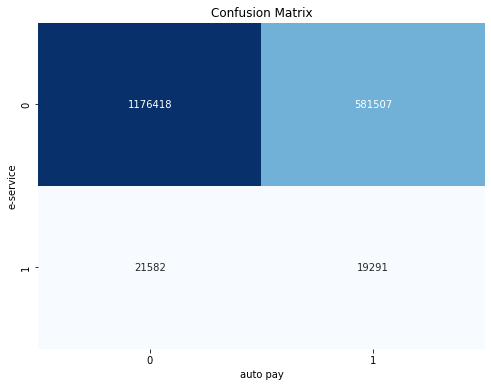

In [245]:
conf_matrix = confusion_matrix(auto_pay, eservice)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('auto pay')
plt.ylabel('e-service')
plt.title('Confusion Matrix')
plt.show()


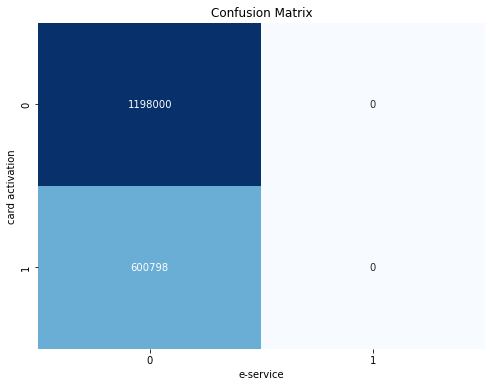

In [244]:
conf_matrix = confusion_matrix(eservice,card_activation)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('e-service')
plt.ylabel('card activation')
plt.title('Confusion Matrix')
plt.show()


In [249]:
df['delinquency_history_13_march'] = df['delinquency_history_13_march'].replace('[20]', '[00]', regex=True)
df['delinquency_history_18_march'] = df['delinquency_history_18_march'].replace('[20]', '[00]', regex=True)

In [250]:
df['resolved_binary'] = df['resolved'].apply(lambda x: 1 if x == 'resolved' else 0)
df['resolved_2'] = df.apply(lambda x: 'hung_up' if x['resolved'] == 'resolved' and x['last_two_letters'] == "TR" else ('resolved' if x['resolved'] == 'resolved' and x['last_two_letters'] != "TR" else 'floor'), axis=1)
df['resolved_binary_2'] = df.apply(lambda x: 1 if x['resolved'] == 'resolved' and x['last_two_letters'] != "TR" else 0, axis=1)

l=range(6,15)
# Create a new DataFrame combining 'first_six_letters' and 'reason' columns
first_column = different_rows.iloc[:, 0]  # Access the first column
first_six_letters = first_column.str[:6]  # Extract the first 6 letters from each entry

for i in l:
    if i + 9 < len(df.columns):
        # Access the i-th and (i+9)-th columns
        column_i = df.iloc[:, i]
        column_i_9 = df.iloc[:, i + 9]

        # Extract rows where column_i is different from column_i_9
        different_rows = df[column_i != column_i_9]
        num_rows = len(different_rows)
        print(f"In between '{df.columns[i]}' and '{df.columns[i+9]}', the number of rows where the status became different is: \n", num_rows)

        distribution_rea = different_rows['reason'].value_counts()
        print("The reasons why they called is: \n", distribution_rea)

        distribution_res = different_rows['resolved_binary'].value_counts()
        print("How many of them are resolved: \n", distribution_res)

In between 'no_of_accounts_with_syf_13_march' and 'no_of_accounts_with_syf_18_march', the number of rows where the status became different is: 
 20521
The reasons why they called is: 
 BA    8543
PP    2884
LS    1687
PT    1231
FD    1028
AT     844
AA     763
FM     557
CT     388
RV     337
AP     234
DP     230
LC     220
RC     204
wa     178
mp     173
IA     152
IC     104
mn      82
PI      77
GA      58
CA      51
PA      49
Pd      45
iR      36
RP      34
SP      31
me      27
WA      26
iL      25
CB      21
DR      21
PS      21
SR      19
MP      17
eA      14
FR      14
eP      13
iF      12
eY      12
PC      10
eL       9
FI       7
RS       7
RI       5
CD       4
ER       3
VA       3
iM       3
iA       2
DE       2
LW       1
BL       1
AU       1
mP       1
Name: reason, dtype: int64
How many of them are resolved: 
 0    11450
1     9071
Name: resolved_binary, dtype: int64
In between 'account_balance_13_march' and 'account_balance_18_march', the number of rows whe

In [258]:
column_i = df.iloc[:, 7]
column_i_9 = df.iloc[:, 16]

different_rows = df.loc[column_i != column_i_9]
num_rows = len(different_rows)
print(f"In between '{df.columns[7]}' and '{df.columns[16]}', the number of rows where the status became different is: \n", num_rows)

# Calculate the difference between two columns
balance_diff = different_rows.iloc[:, 16] - different_rows.iloc[:, 7]
balance_diff_mean = balance_diff.mean()  # Calculate the mean of the difference
print(f"In between '{df.columns[7]}' and '{df.columns[16]}', the change of balance is: \n", balance_diff_mean)

distribution_rea = different_rows['reason'].value_counts()
print("The reasons why they called is: \n", distribution_rea)

distribution_res = different_rows['resolved_binary'].value_counts()
print("How many of them are resolved: \n", distribution_res)


In between 'account_balance_13_march' and 'account_balance_18_march', the number of rows where the status became different is: 
 282339
In between 'account_balance_13_march' and 'account_balance_18_march', the change of balance is: 
 9.662406975403176
The reasons why they called is: 
 BA    121953
PP     56142
PT     35939
AT     16525
AA     11880
       ...  
LW         2
mt         2
Ls         1
mm         1
AU         1
Name: reason, Length: 67, dtype: int64
How many of them are resolved: 
 1    208275
0     74064
Name: resolved_binary, dtype: int64


In [294]:
df['time_called'] = df.iloc[:, 0].str[:8]  

res = df[df['resolved_2'] == 'resolved']
hng = df[df['resolved_2'] == 'hung_up']
flr = df[df['resolved_2'] == 'floor']


res_tim = res['time_called'].value_counts()
hng_tim = hng['time_called'].value_counts()
flr_tim = flr['time_called'].value_counts()

print("The time the customer called and resolved:\n",res_tim)
print("The time the customer called and hung up:\n",hng_tim)
print("The time the customer called and floor:\n",flr_tim)


The time the customer called and resolved:
 24031512    14708
24031511    14482
24031513    14183
24031514    13585
24031412    13290
            ...  
24031604      586
24031705      542
24031703      466
24031704      439
24031323       62
Name: time_called, Length: 97, dtype: int64
The time the customer called and hung up:
 24031516    22048
24031515    21507
24031512    21338
24031513    21122
24031514    20964
            ...  
24031604      614
24031705      531
24031703      517
24031704      462
24031323      105
Name: time_called, Length: 97, dtype: int64
The time the customer called and floor:
 24031515    11516
24031514    11380
24031512    11086
24031513    11071
24031516    10991
            ...  
24031605      132
24031703      129
24031704      112
24031705      106
24031323       36
Name: time_called, Length: 97, dtype: int64


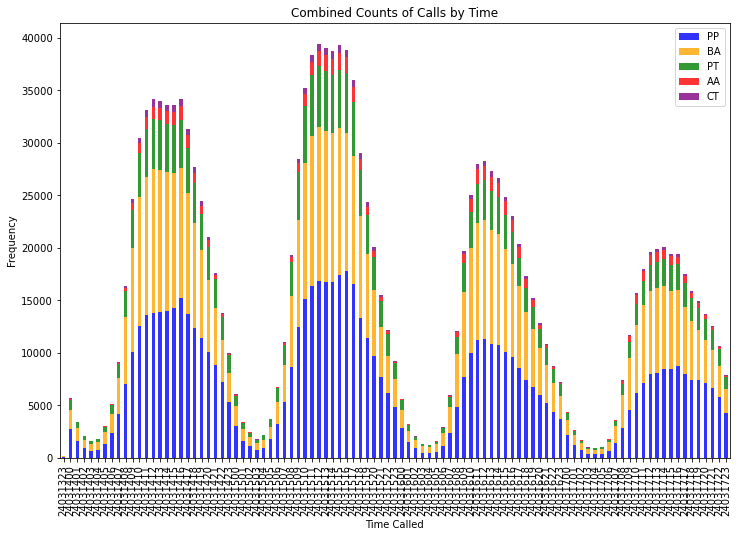

In [96]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'res', 'hng', and 'flr' DataFrames are defined earlier in the code

l3 = ['PP', 'BA', 'PT', 'AA', 'CT']

# Define custom colors for each reason category
colors = ['blue', 'orange', 'green', 'red', 'purple']

# Lists to store counts for each reason category
counts_list = []

for i, color in zip(l3, colors):
    re = df[df['reason'] == i]
    re_tim = re['time_called'].value_counts()
    counts_list.append(re_tim)

# Concatenate counts for all reason categories
combined_counts = pd.concat(counts_list, axis=1, keys=l3)
combined_counts.fillna(0, inplace=True)

# Sort the combined counts by time called
combined_counts_sorted = combined_counts.sort_index()

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting the combined counts of calls by time as a stacked bar chart with custom colors
combined_counts_sorted.plot(kind='bar', stacked=True, color=colors, ax=ax, alpha=0.8)
ax.set_xlabel('Time Called')
ax.set_ylabel('Frequency')
ax.set_title('Combined Counts of Calls by Time')
ax.tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability

plt.show()


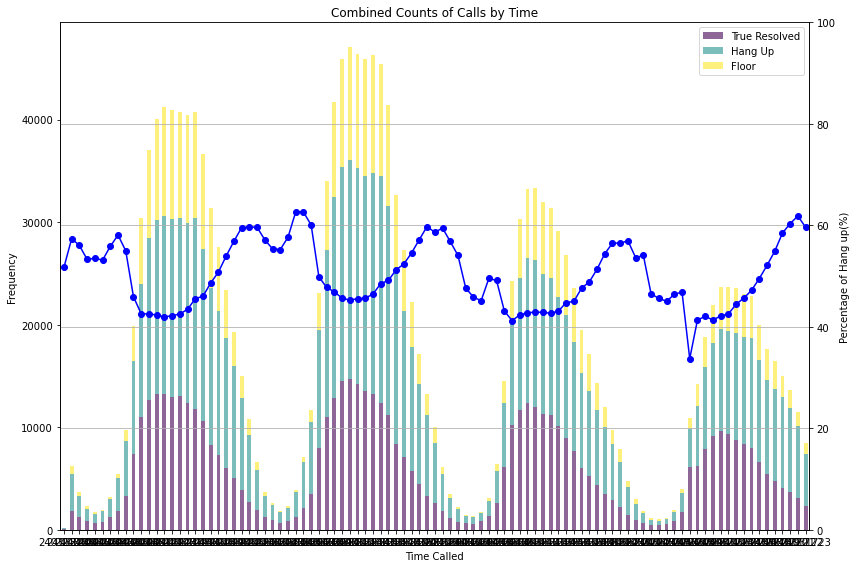

In [114]:
import pandas as pd
import matplotlib.pyplot as plt

res = df[df['resolved_2'] == 'resolved']
hng = df[df['resolved_2'] == 'hung_up']
flr = df[df['resolved_2'] == 'floor']

res_tim = res['time_called'].value_counts()
hng_tim = hng['time_called'].value_counts()
flr_tim = flr['time_called'].value_counts()

combined_counts = pd.concat([res_tim, hng_tim, flr_tim], axis=1, keys=['True Resolved', 'Hang Up', 'Floor'])
combined_counts.fillna(0, inplace=True)

percentage_hung_up = (hng_tim) / (hng_tim + flr_tim+res_tim) * 100


# Sort the combined counts by time called
combined_counts_sorted = combined_counts.sort_index()

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting the combined counts of calls by time as a stacked bar chart
combined_counts_sorted.plot(kind='bar', stacked=True, cmap='viridis', ax=ax, alpha=0.6)
ax.set_xlabel('Time Called')
ax.set_ylabel('Frequency')
ax.set_title('Combined Counts of Calls by Time')
ax.tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability

# Plotting the percentage of hung up calls over the sum of hung up and floor calls by time as a line plot
percentage_hung_up.plot(kind='line', marker='o', color='blue', ax=ax, secondary_y=True)
ax.right_ax.set_ylabel('Percentage of Hang up(%)')
ax.right_ax.grid(True)  # Add grid lines for the line plot

# Set the limits of the secondary y-axis to start from 0%
ax.right_ax.set_ylim(0, 100)

plt.tight_layout()
plt.show()


No handles with labels found to put in legend.


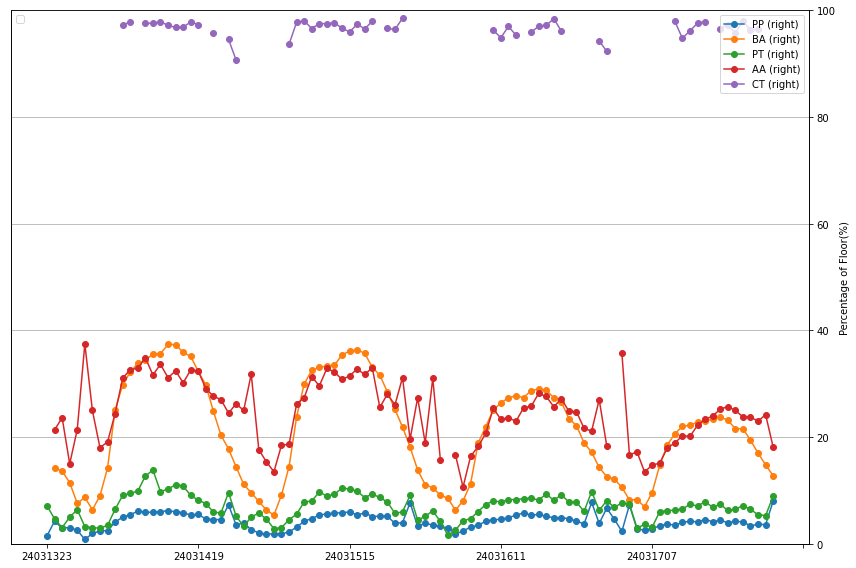

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

df['time_called'] = df.iloc[:, 0].str[:8]  

l3=['PP','BA', 'PT','AA','CT']

# Create a figure and axis object outside the loop
fig, ax = plt.subplots(figsize=(12, 8))

for i in l3:
    pp = df[df['reason'] == i]

    res = pp[pp['resolved_2'] == 'resolved']
    hng = pp[pp['resolved_2'] == 'hung_up']
    flr = pp[pp['resolved_2'] == 'floor']

    res_tim = res['time_called'].value_counts()
    hng_tim = hng['time_called'].value_counts()
    flr_tim = flr['time_called'].value_counts()

    # Calculate the percentage of hung-up calls over the sum of hung-up and floor calls
    percentage_hung_up = (flr_tim / (hng_tim + flr_tim + res_tim)) * 100

    # Plotting the percentage of hung-up calls over the sum of hung-up and floor calls by time as a line plot
    percentage_hung_up.plot(kind='line', marker='o', label=i, ax=ax, secondary_y=True)

# Set labels and legend
ax.set_ylabel('Count')
ax.right_ax.set_ylabel('Percentage of Floor(%)')
ax.right_ax.grid(True)  # Add grid lines for the line plot
ax.legend(loc='upper left')
ax.right_ax.legend(loc='upper right')

# Set the limits of the secondary y-axis to start from 0%
ax.right_ax.set_ylim(0, 100)

plt.tight_layout()
plt.show()


No handles with labels found to put in legend.


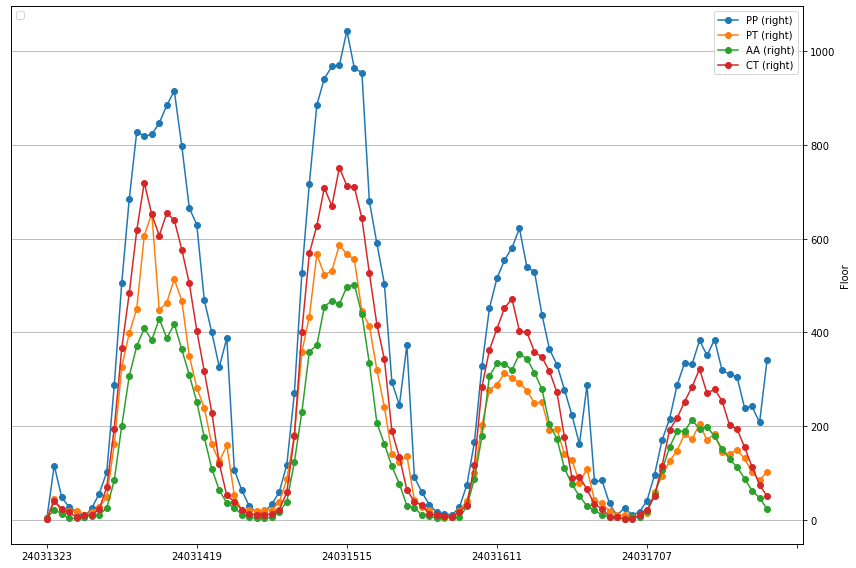

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

df['time_called'] = df.iloc[:, 0].str[:8]

l3 = ['PP','PT', 'AA', 'CT']

# Create a figure and axis object outside the loop
fig, ax = plt.subplots(figsize=(12, 8))

for i in l3:
    pp = df[df['reason'] == i]

    flr = pp[pp['resolved'] == 'floor']

    flr_tim = flr['time_called'].value_counts().sort_index()  # Sort the index (time) for plotting

    # Check if flr_tim is not empty
    if not flr_tim.empty:
        # Plotting the count of floor calls by time as a line plot
        flr_tim.plot(kind='line', marker='o', label=i, ax=ax, secondary_y=True)

# Set labels and legend
ax.set_ylabel('Count')
ax.right_ax.set_ylabel('Floor')
ax.right_ax.grid(True)  # Add grid lines for the line plot

# Add legend
ax.legend(loc='upper left')
ax.right_ax.legend(loc='upper right')

plt.tight_layout()
plt.show()


In [47]:
pp = df[df['reason'] == 'PP']

flr = pp[pp['resolved'] == 'floor']

flr_tim = flr['time_called'].value_counts()
print(flr_tim)

24031515    1044
24031514     970
24031513     968
24031516     964
24031517     955
            ... 
24031705      10
24031605      10
24031703       9
24031404       6
24031323       1
Name: time_called, Length: 97, dtype: int64


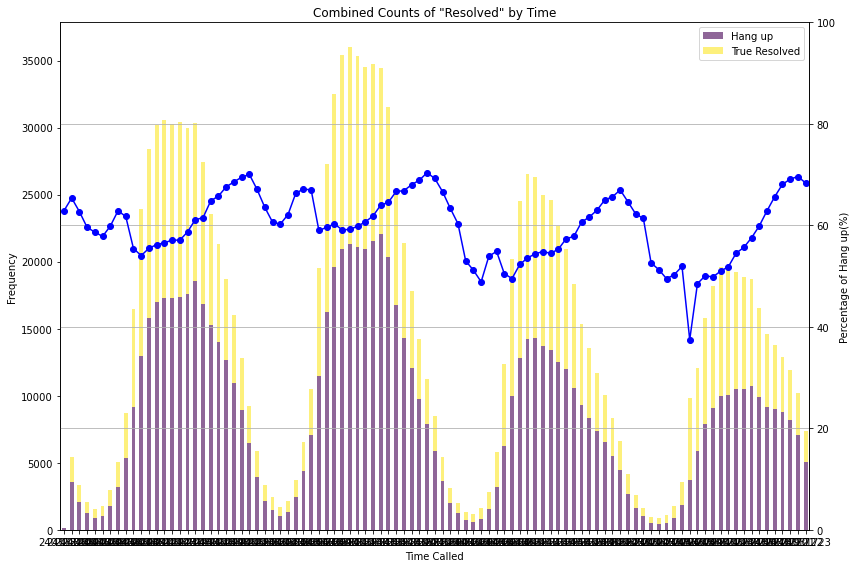

In [113]:
combined_counts = pd.concat([hng_tim,res_tim], axis=1, keys=['Hang up','True Resolved'])
combined_counts.fillna(0, inplace=True)

# Calculate the percentage of hng_tim / (hng_tim + flr_tim)
percentage_hung_up = hng_tim / (hng_tim + res_tim) * 100

# Sort the combined counts by time called
combined_counts_sorted = combined_counts.sort_index()

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting the combined counts of calls by time as a stacked bar chart
combined_counts_sorted.plot(kind='bar', stacked=True, cmap='viridis', ax=ax, alpha=0.6)
ax.set_xlabel('Time Called')
ax.set_ylabel('Frequency')
ax.set_title('Combined Counts of "Resolved" by Time')
ax.tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability

# Plotting the percentage of hung up calls over the sum of hung up and floor calls by time as a line plot
percentage_hung_up.plot(kind='line', marker='o', color='blue', ax=ax, secondary_y=True)
ax.right_ax.set_ylabel('Percentage of Hang up(%)')
ax.right_ax.grid(True)  # Add grid lines for the line plot

# Set the limits of the secondary y-axis to start from 0%
ax.right_ax.set_ylim(0, 100)

plt.tight_layout()
plt.show()


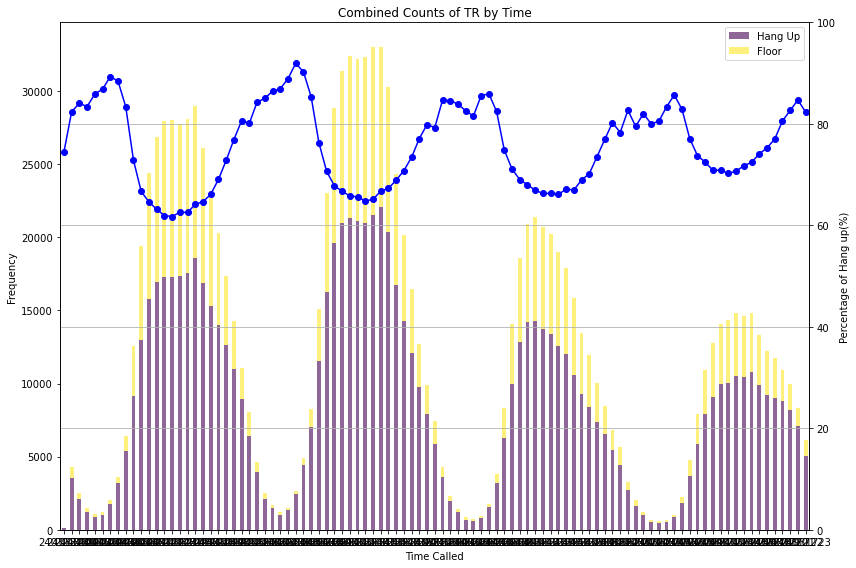

In [107]:
import pandas as pd
import matplotlib.pyplot as plt

# Combine the counts for each unique time called across all categories
combined_counts = pd.concat([hng_tim, flr_tim], axis=1, keys=['Hang Up', 'Floor'])
combined_counts.fillna(0, inplace=True)

# Calculate the percentage of hng_tim / (hng_tim + flr_tim)
percentage_hung_up = hng_tim / (hng_tim + flr_tim) * 100

# Sort the combined counts by time called
combined_counts_sorted = combined_counts.sort_index()

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting the combined counts of calls by time as a stacked bar chart
combined_counts_sorted.plot(kind='bar', stacked=True, cmap='viridis', ax=ax, alpha=0.6)
ax.set_xlabel('Time Called')
ax.set_ylabel('Frequency')
ax.set_title('Combined Counts of TR by Time')
ax.tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability

# Plotting the percentage of hung up calls over the sum of hung up and floor calls by time as a line plot
percentage_hung_up.plot(kind='line', marker='o', color='blue', ax=ax, secondary_y=True)
ax.right_ax.set_ylabel('Percentage of Hang up(%)')
ax.right_ax.grid(True)  # Add grid lines for the line plot

# Set the limits of the secondary y-axis to start from 0%
ax.right_ax.set_ylim(0, 100)

plt.tight_layout()
plt.show()


TypeError: yscale() missing 1 required positional argument: 'value'

<Figure size 1152x576 with 0 Axes>

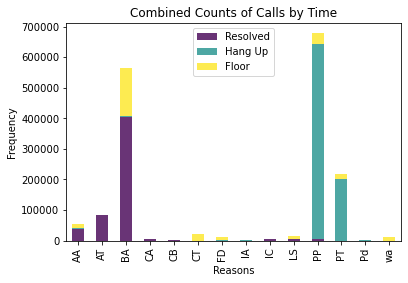

In [36]:
import matplotlib.pyplot as plt

# Assuming you have already defined 'res', 'hng', 'flr', and 'df'

res_tim = res['reason'].value_counts()
hng_tim = hng['reason'].value_counts()
flr_tim = flr['reason'].value_counts()

combined_counts = pd.concat([res_tim.iloc[0:8], hng_tim.iloc[0:8], flr_tim.iloc[0:8]], axis=1, keys=['Resolved', 'Hang Up', 'Floor'])
combined_counts.fillna(0, inplace=True)

# Sort the combined counts by time called
combined_counts_sorted = combined_counts.sort_index()

# Plotting
plt.figure(figsize=(16, 8))  # Larger figure size
combined_counts_sorted.plot(kind='bar', stacked=True, cmap='viridis', alpha=0.8)
plt.xlabel('Reasons')
plt.ylabel('Frequency')
plt.title('Combined Counts of Calls by Time')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Set y-axis scale to logarithmic
plt.yscale()

plt.tight_layout()
plt.show()


In [309]:
flr = df[df['resolved'] == 'floor']
flrr = flr['mos']
flrrr=flrr.str[-2:]

last_two_letters = flrrr.value_counts()
print(last_two_letters.head(20))

TR    350077
LC      6064
RS      3461
mt      1907
nl      1479
wa       677
mm       487
mo       453
CT       372
PT       170
AT       159
mp       137
BA       105
LS        91
AP        63
me        44
HI        41
RC        40
MP        32
WA        31
Name: mos, dtype: int64
